# ECT_HW2_104403553_v1

### import 需要的一些packages，graphviz 拿來畫圖用的

In [57]:
import pandas as pd
import graphviz
from sklearn import preprocessing
from sklearn import tree
from sklearn import metrics

### 讀glass.csv近來

In [58]:
data = pd.read_csv('glass.csv')

### 將讀進來的資料分為input跟output
* x 是input<br>
* y 是output: type

In [59]:
#x:input
x=data.loc[:,['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
#y:output
y=data.loc[:,['Type']]

### 將Type轉成label

In [60]:
le = preprocessing.LabelEncoder()
Y_glass_label = le.fit_transform(y.Type)

In [61]:
feature=list(zip(x.RI, x.Na, x.Mg, x.Al, x.Si, x.K, x.Ca, x.Ba, x.Fe))
import numpy as np
features=np.asarray(feature)

### 將dataset 切出 training set,test set出來

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, Y_glass_label, test_size=0.34)

### train 出那棵樹

In [63]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3,max_leaf_nodes = 4)
glass_clf = clf.fit(X_train,y_train)

### 驗證剛剛train的樹的準確度

In [64]:
predicted_train = glass_clf.predict(X_train)
accuracy_train = metrics.accuracy_score(predicted_train, y_train)
print('accuracy train ')
print(accuracy_train)
predicted_test = glass_clf.predict(X_test)
accuracy_test = metrics.accuracy_score(predicted_test, y_test)
print('accuracy test')
print(accuracy_test)

accuracy train 
0.6524822695035462
accuracy test
0.6438356164383562


### 用graphviz來視覺化那棵樹

In [65]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("glass") 

'glass.pdf'

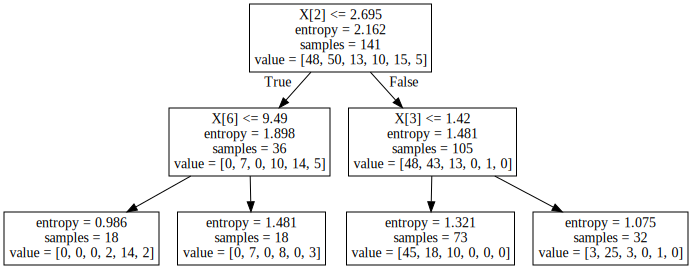

In [66]:
graph